#K-means números aleatorios
---
@Autor: Santiago Eduardo Muñoz Castillo


##Importar librerias y bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

##Crear arrays con números aleatorios

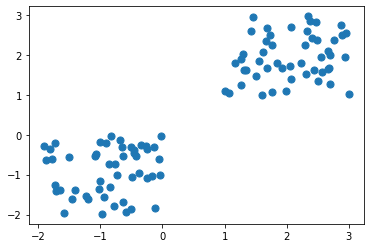

In [12]:
#Array de 100 x 2 
X = -2 * np.random.rand(100,2)
#Cambiamos datos de la columna 0 entre el 50 al 100 con datos lejanos
X[50:100, :] = 1 +(2 * np.random.rand(50,2))
#Generamos dos grupos (columna1 y columan2)
plt.scatter(X[ : ,0], X[ :, 1], s=50)
plt.show()

##Creamos la instancia del algoritmo

In [13]:
#Como sabemos de entrada que son dos grupos entonces seran dos centroides
Kmean = KMeans(n_clusters=2)
Kmean.fit(X)

KMeans(n_clusters=2)

##Buscamos los centroides

In [14]:
Centros = Kmean.cluster_centers_

## Dibujamos los centroides para cada cluster

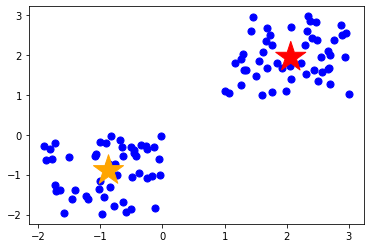

In [15]:
colores=['orange','red']
plt.scatter(X[:,0],X[:,1], s=50, c='b')
plt.scatter(Centros[:,0], Centros[:,1], marker='*', c=colores, s=1000)

##Probando el algoritmo

In [16]:
#Forma como se crearon los clusters (0 y 1)
Kmean.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

##Probando los datos manuales

In [17]:
data_test=np.array([-3.0,-3.0]).reshape(1,-1)
Kmean.predict(data_test)

array([0], dtype=int32)

#K-means prestamos bancarios

##Importando librerias

In [18]:
import pandas as pd
import numpy as np
import random as rd

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

##Importando dataset

---
Fuente: [Github](https://github.com/luisFernandoCastellanosG/Machine_learning/blob/9b512dc6aaa4781d4a775842a6c0d32b9fbf4fbd/1-Machine_Learning_Classic/Databasets/k-means-prestamos.csv
)

In [19]:
df_bank = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/1-Machine_Learning_Classic/Databasets/k-means-prestamos.csv")
df_bank.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


## Conociendo los datos

### Descripción

In [20]:
df_bank.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


### Buscando datos nulos

In [21]:
df_bank.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

Tomaremos sólo dos variables de los datos - "LoanAmount"/monto del prestamo y "ApplicantIncome"/ingresos del cliente

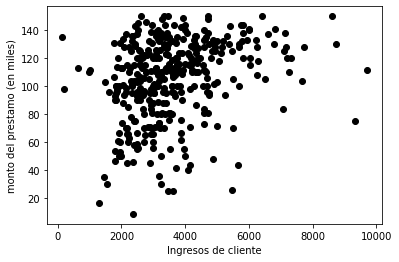

In [23]:
X = df_bank[["LoanAmount","ApplicantIncome"]]
plt.scatter(X["ApplicantIncome"], X["LoanAmount"],c='black')
plt.xlabel('Ingresos de cliente')
plt.ylabel('monto del prestamo (en miles)')
plt.show()

##Buscando los centroides

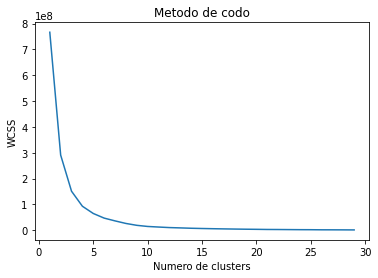

In [26]:
#WCSS es la suma de cuadrados de las distancias
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', 
                    max_iter=300, n_init=10, random_state=0
                    )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss)
plt.title('Metodo de codo')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')
plt.show()